<a href="https://colab.research.google.com/github/jdiegosierra/MLProjects/blob/main/digit-recognicer/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install tensorflow==2.18.0
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install scikit-learn==1.6.1

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data

In [30]:
train = pd.read_csv('train.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41870,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41871,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41872,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41873,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
test = pd.read_csv('test.csv')
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x_train = train.iloc[:,1:].values.astype('float32').reshape(train.shape[0], 28, 28, 1)

y_train = train.iloc[:,0].values.astype('int32')

x_test = test.values.astype('float32').reshape(test.shape[0], 28, 28, 1)

y_train_categorical = keras.utils.to_categorical(y_train)

x_train_splited, x_val, y_train_categorical_splited, y_val = train_test_split(x_train,
                                                                              y_train_categorical,
                                                                              test_size=0.10,
                                                                              random_state=42)

In [32]:
num_classes = y_train_categorical.shape[1]

In [33]:
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(x):
    return (x-mean_px)/std_px

In [34]:
gen = keras.preprocessing.image.ImageDataGenerator()

batches = gen.flow(x_train_splited, y_train_categorical_splited, batch_size=64)

val_batches = gen.flow(x_val, y_val, batch_size=64)

### Visualization


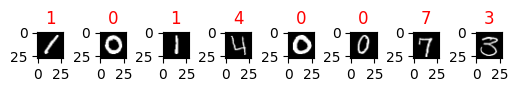

In [35]:
i = 0
positions = range(8)
for digit in positions:
    i += 2
    plt.subplot(1, len(positions)*2, i)
    plt.imshow(x_train[digit], cmap=plt.get_cmap('gray'))
    plt.title(y_train[digit], {'color': 'red'});

# Designing Neural Network Architecture¶


## Linear Model

In [36]:
model = keras.models.Sequential([keras.layers.Input(shape=(28,28,1)),
                                 keras.layers.Lambda(standardize),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=num_classes, activation='softmax')])

In [37]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=3,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/3
37687/37687 ━━━━━━━━━━━━━━━━━━━━ 3s 73us/step - accuracy: 0.0999 - loss: nan - val_accuracy: 0.0986 - val_loss: nan
Epoch 2/3
37687/37687 ━━━━━━━━━━━━━━━━━━━━ 3s 73us/step - accuracy: 0.0999 - loss: nan - val_accuracy: 0.0986 - val_loss: nan
Epoch 3/3
37687/37687 ━━━━━━━━━━━━━━━━━━━━ 3s 75us/step - accuracy: 0.0999 - loss: nan - val_accuracy: 0.0986 - val_loss: nan


## Fully Connected Model

In [13]:
model = keras.models.Sequential([keras.layers.Input(shape=(28,28,1)),
                                 keras.layers.Lambda(standardize),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=512, activation='relu'),
                                 keras.layers.Dense(units=num_classes, activation='softmax')])

In [14]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=3,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 4s 165us/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.0985 - val_loss: nan
Epoch 2/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 3s 77us/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.0985 - val_loss: nan
Epoch 3/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 1s 72us/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.0985 - val_loss: nan


## Convolutional Neural Network

In [16]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Lambda(standardize),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dense(units=num_classes, activation='softmax')
])

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=3,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 10s 351us/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.0985 - val_loss: nan
Epoch 2/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 4s 85us/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.0985 - val_loss: nan
Epoch 3/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 1s 77us/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.0985 - val_loss: nan


## Data Augmentation

In [19]:
gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=8,
                        width_shift_range=0.08,
                        shear_range=0.3,
                        height_shift_range=0.08,
                        zoom_range=0.08)

batches = gen.flow(x_train_splited, y_train_categorical_splited, batch_size=64)

val_batches = gen.flow(x_val, y_val, batch_size=64)

In [20]:
model.optimizer.lr = 0.001

In [21]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=3,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 5s 369us/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.0985 - val_loss: nan
Epoch 2/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 5s 374us/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.0985 - val_loss: nan
Epoch 3/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 6s 415us/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.0985 - val_loss: nan


## Adding Batch Normalization

In [22]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Lambda(standardize),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Convolution2D(32,(3,3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.BatchNormalization(axis=1),
    keras.layers.Dense(units=num_classes, activation='softmax')
])

In [23]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.optimizer.lr = 0.001

In [25]:
history = model.fit(batches,
                    steps_per_epoch=batches.n,
                    epochs=3,
                    validation_data=val_batches,
                    validation_steps=val_batches.n)

Epoch 1/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 17s 728us/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.0985 - val_loss: nan
Epoch 2/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 5s 357us/step - accuracy: 0.0994 - loss: nan - val_accuracy: 0.0985 - val_loss: nan
Epoch 3/3
13421/13421 ━━━━━━━━━━━━━━━━━━━━ 5s 356us/step - accuracy: 0.0993 - loss: nan - val_accuracy: 0.0985 - val_loss: nan


In [26]:
predictions = model.predict(x_test, verbose=0)

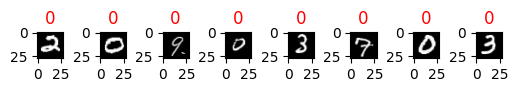

In [27]:
i = 0
positions = range(8)
for digit in positions:
    i += 2
    plt.subplot(1, len(positions)*2, i)
    plt.imshow(x_test[digit], cmap=plt.get_cmap('gray'))
    plt.title(np.argmax(predictions[digit]), {'color': 'red'});